In [1]:
import os
from scipy import misc

In [2]:
%pylab inline --no-import-all
from PIL import Image 

/Users/peterhirt/anaconda/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
from ipywidgets import widgets  
from ipywidgets import interact

# testing

In [4]:
#path = 'patches/fibrosis/fibrosis_diffuse'
path = '../patches/consolidation/consolidation_non-relevant'
file_name = '105_slice_8_consolidation_non-relevant_4_1.bmp' 
image = misc.imread(os.path.join(path,file_name), flatten= 0)

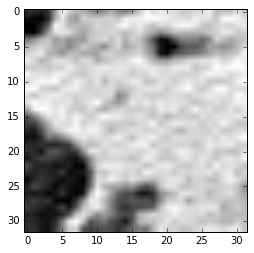

In [5]:
plt.imshow(Image.open(path + '/' + file_name)) 

# display category / sub-category images

In [6]:
# define the current work directory
cwd=os.getcwd()
print cwd

one_folder_up = os.path.dirname(os.getcwd())
print one_folder_up

/Users/peterhirt/datascience/ild-cnn/notebooks
/Users/peterhirt/datascience/ild-cnn


In [14]:
comments = [[6, 'all OK'],
            [24, 'all OK'],
            [14, 'all OK'],
            [15, 'all OK'],
            [4, 'all OK'],
            [360, 'NOK: 112-127, 145, 146'],
            [366, 'all OK'],
            [358, 'NOK: 0-16, 325-330'],
            [39, 'all OK'],
            [2, 'all OK, but funny'],
            [10, 'all OK'],
            [185, 'all OK'],
            [141, 'NOK: 33-64'],
            [483, 'NOK: 31-36,43-86,89,87,94-92,96,97,104,111,110,115,117,118,120,136,137,201,207-217'],
            [38, 'all OK'],
            [60, 'all OK'],
            [1562, 'NOK: 266-555, and more, not all were checked'],
            [1035, 'NOK: 0-172, and more'],
            [1167, 'NOK: 0-7, and more'],
            [92, 'all OK'],
            [38, 'all OK'],
            [109, 'all OK'],
            [101, 'all OK'],
            [58, 'all OK']
           ]
print comments[0][1], 'there are', len(comments), 'categories or sub-categories'

all OK there are 24 categories or sub-categories


In [17]:
# create path to patch directory
patch_dir = os.path.join(one_folder_up, 'patches')
print patch_dir
category_list = (os.listdir(patch_dir))
print 'taking out the item : ', category_list.pop(0)
print category_list
ind = 0

for category in category_list:
    category_dir = os.path.join(patch_dir, category)
    print category
    
    sub_category_list = (os.listdir(category_dir))
    sub_category_list.pop(0)
    for sub_category in sub_category_list:
        
        print sub_category , comments[ind][0], comments[ind][1]
        ind += 1
    print ''

/Users/peterhirt/datascience/ild-cnn/patches
taking out the item :  .DS_Store
['consolidation', 'fibrosis', 'ground_glass', 'healthy', 'micronodules', 'reticulation']
consolidation
consolidation_apical 6 all OK
consolidation_diffuse 24 all OK
consolidation_non-relevant 14 all OK
consolidation_peripheral_sub_pleural 15 all OK

fibrosis
fibrosis_apical 4 all OK
fibrosis_basal 360 NOK: 112-127, 145, 146
fibrosis_diffuse 366 all OK
fibrosis_non-relevant 358 NOK: 0-16, 325-330
fibrosis_perihilar 39 all OK
fibrosis_peripheral_sub_pleural 2 all OK, but funny

ground_glass
ground_glass_apical 10 all OK
ground_glass_basal 185 all OK
ground_glass_diffuse 141 NOK: 33-64
ground_glass_non-relevant 483 NOK: 31-36,43-86,89,87,94-92,96,97,104,111,110,115,117,118,120,136,137,201,207-217
ground_glass_peripheral_sub_pleural 38 all OK

healthy
healthy_apical 60 all OK
healthy_non-relevant 1562 NOK: 266-555, and more, not all were checked

micronodules
micronodules_diffuse 1035 NOK: 0-172, and more
microno

In [9]:
print patch_dir

 /Users/peterhirt/datascience/ild-cnn/patches


# interactive part

In [25]:
# choose the dataset to look at

category_chosen = category_list[1]
print category_chosen

category_dir = os.path.join(patch_dir, category_chosen)

sub_category_list = (os.listdir(category_dir))

sub_category_chosen = sub_category_list[2]
print sub_category_chosen

fibrosis
fibrosis_basal


In [26]:
images = []
filenames = []

category = category_chosen
    
category_dir = os.path.join(patch_dir, category)
# print  'the path into the categories is: ', category_dir
    
sub_categories_dir_list = (os.listdir(category_dir))
    
subCategory = sub_category_chosen
            
subCategory_dir = os.path.join(category_dir, subCategory) 
        
subCat = (os.listdir(subCategory_dir))
        
num_patches = 0       
for file in subCat:
                
    if file.find('.bmp') > 0:
                
        # load the .bmp file into array       
        image = misc.imread(os.path.join(subCategory_dir,file), flatten= 0)
        # append the array to the dataset list
                
        images.append(image)
        filenames.append(file)
        
        num_patches+=1
print 'found', num_patches, 'patches' 
        

found 360 patches


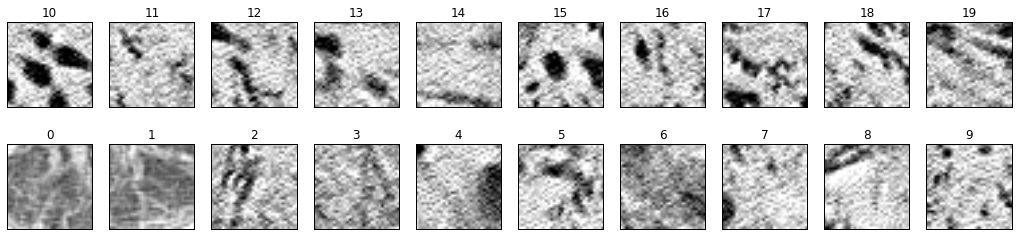

In [27]:
button = widgets.Button(description='display first 20 patches')
display(button)



def on_button_clicked(b):
    
    if num_patches < 20:
        print 'Cannot use this for patch sizes smaller than 20'
        return

    print b
    fig = plt.figure()
    fig.set_size_inches(18, 8)
 
    for j in range(0,2):
        for i in  range(1,11):
    
            patch = fig.add_subplot(j+1,10,i)
        
    
            ind = (i+j*10-1)
            patch.set_title(str(ind))
            patch.axes.get_xaxis().set_visible(False)
            patch.axes.get_yaxis().set_visible(False)
       
            patch.imshow(images[ind]);
    
    
    
        
button.on_click(on_button_clicked)
   
        

In [21]:
def browse_images(images):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %s' % i)
        plt.show()
    interact(view_image, i=(0,n-1))

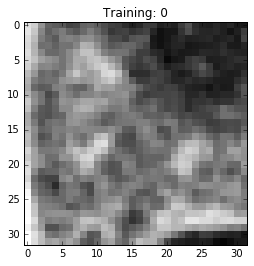

In [22]:
browse_images(images)